<a href="https://colab.research.google.com/github/rayees-codes/Capstone-3-Rayees-Cell-Images-Classification/blob/main/Capstone_3_Full_notebook_RAYEES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 3 - Cell Images Classification - Infected (Parasitized) or Uninfected

Completed by: Rayees Ahamed B


**Dataset Info:**

Kaggle Data Repo - https://www.kaggle.com/brsdincer/cell-images-parasitized-or-not

Data can be downloaded from the above linked page. Originally deposited by [Baris Dincer](https://www.kaggle.com/brsdincer) in Kaggle datasets page. It contains more than 10000 images to train and test to identify the infected and uninfected class of images. 


## Contents
* Introduction
* PART 1: Data Wrangling and EDA

  * 1.1 Importing packages and libraries
  * 1.2 Setting the path and labels
  * 1.3 Coverting to series 
  * 1.4 Converting to dataframe
* PART 2: Preprocessing, Modeling and Final Steps
  * 2.1 Shuffling the dataframe
  * 2.2 Image visualization
  * 2.3 Image processing
      * Edge detection
      * Thresholding
      * Contours
  * 2.4 Subsetting the dataframe into Parasitized & Uninfected
  * 2.5 Image augmentation
  * 2.6 Train/Validation/Test data split
  * 2.7 Modeling and training
  * 2.8 Prediction
  * 2.9 Deployment on test

## Introduction

**Problem statement:**

Predicting the parasite infected and uninfected cells from microscopic images

**Context:**

Infectious diseases such as malaria, dengue are caused by parasites like viruses. After infection, the patient's cells start spreading these parasites all over the body. Once the body cells are infected with parasites, that is called ‘parasitized’ or ‘infected’ cells. Other hand, the cells that are not infected with parasites are called ‘uninfected’. So, it is crucial to detect these infected (parasitized) cells before they cause serious illness to patients. We can identify these infected cells using their images which are stained with chemical dyes. 

Generally, two types of dyes are used to identify the ‘infected’ and ‘uninfected’ cells: 1. eosin (pink) and 2. hematoxylin (blue). Simply to understand, the images which contain the blue stains are infected with parasites, whereas cell images containing only pink are classified as uninfected cells. Here, we aim to classify the infected and uninfected images by training more than 10000 images that will help in predicting the right class upon testing.

**Criteria for success:**

* Labeling, feature extraction and training the two classes of images

* Building and testing a reliable model that can predict the infected images with high performance metrics


## Cloning files from Github

In [1]:
! git clone https://github.com/rayees-codes/Capstone-3-Rayees-Cell-Images-Classification.git

Cloning into 'Capstone-3-Rayees-Cell-Images-Classification'...
remote: Enumerating objects: 27581, done.
remote: Counting objects: 100% (27581/27581), done.
remote: Compressing objects: 100% (27579/27579), done.
remote: Total 27581 (delta 2), reused 27579 (delta 0), pack-reused 0
Receiving objects: 100% (27581/27581), 331.72 MiB | 17.11 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (27565/27565), done.


## PART I: Data wrangling and EDA

### Importing packages and libraries

In [2]:
#GENERAL 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob

In [4]:
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image

### Setting the path and labels

**Main Path**

In [5]:
Main_Train_Path = Path("..//content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/train")
Main_Test_Path = Path("..//content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/test")

**PNG Path**

In [6]:
Train_PNG_Path = list(Main_Train_Path.glob(r"*/*.png"))
Test_PNG_Path = list(Main_Test_Path.glob(r"*/*.png"))

In [7]:
print(Train_PNG_Path[0:5])

[PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/train/uninfected/C177P138NThinF_IMG_20151201_143025_cell_170.png'), PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/train/uninfected/C152P113ThinF_IMG_20151115_124217_cell_145.png'), PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/train/uninfected/C77P38ThinF_IMG_20150601_152941_cell_40.png'), PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png'), PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/train/uninfected/C70P31_ThinF_IMG_20150813_130332_cell_44.png')]


In [8]:
print(Test_PNG_Path[0:5])

[PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/test/uninfected/C42P5thin_original_IMG_20150623_134426_cell_17.png'), PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/test/uninfected/C215ThinF_IMG_20151106_133043_cell_121.png'), PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/test/uninfected/C162P123ThinF_IMG_20151116_102751_cell_123.png'), PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/test/uninfected/C118P79ThinF_IMG_20151002_105018_cell_67.png'), PosixPath('../content/Capstone-3-Rayees-Cell-Images-Classification/input/cell-images-parasitized-or-not/cell_images/cell_images/test/uninfected/C58P19thinF_IMG_20150802_122846_cell_145.png')]


**Labels**

In [9]:
Train_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_PNG_Path))

In [10]:
print("Parasitized: ",Train_PNG_Labels.count("parasitized"))
print("Uninfected: ",Train_PNG_Labels.count("uninfected"))

Parasitized:  12479
Uninfected:  12479


In [11]:
Test_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_PNG_Path))

In [12]:
print("Parasitized: ",Test_PNG_Labels.count("parasitized"))
print("Uninfected: ",Test_PNG_Labels.count("uninfected"))

Parasitized:  1300
Uninfected:  1300


**Converting to Series**

In [13]:
Train_PNG_Path_Series = pd.Series(Train_PNG_Path,name="PNG").astype(str)
Train_PNG_Labels_Series = pd.Series(Train_PNG_Labels,name="CATEGORY")

In [14]:
Test_PNG_Path_Series = pd.Series(Test_PNG_Path,name="PNG").astype(str)
Test_PNG_Labels_Series = pd.Series(Test_PNG_Labels,name="CATEGORY")

**Converting to DataFrame**

In [15]:
Main_Train_Data = pd.concat([Train_PNG_Path_Series,Train_PNG_Labels_Series],axis=1)

In [16]:
print(Main_Train_Data.head(-1))

                                                     PNG     CATEGORY
0      ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
1      ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
2      ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
3      ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
4      ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
...                                                  ...          ...
24952  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
24953  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
24954  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
24955  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
24956  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized

[24957 rows x 2 columns]


In [17]:
Main_Test_Data = pd.concat([Test_PNG_Path_Series,Test_PNG_Labels_Series],axis=1)

In [18]:
print(Main_Test_Data.head(-1))

                                                    PNG     CATEGORY
0     ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
1     ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
2     ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
3     ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
4     ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
...                                                 ...          ...
2594  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2595  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2596  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2597  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2598  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized

[2599 rows x 2 columns]


### Exploratory Data Analysis
**Shuffling the DataFrame** 

In [20]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [21]:
print(Main_Train_Data.head(-1))

                                                     PNG     CATEGORY
0      ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
1      ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
2      ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
3      ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
4      ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
...                                                  ...          ...
24952  ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
24953  ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
24954  ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
24955  ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
24956  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized

[24957 rows x 2 columns]


In [22]:
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)

In [23]:
print(Main_Test_Data.head(-1))

                                                    PNG     CATEGORY
0     ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
1     ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2     ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
3     ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
4     ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
...                                                 ...          ...
2594  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2595  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2596  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2597  ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected
2598  ../content/Capstone-3-Rayees-Cell-Images-Class...   uninfected

[2599 rows x 2 columns]


### Image visualization

In [24]:
plt.style.use("classic")

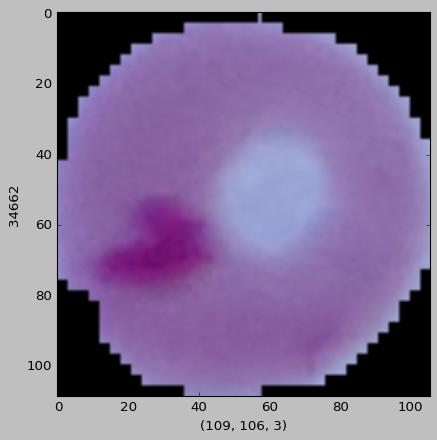

In [87]:
E_IMG = cv2.imread(Main_Train_Data["PNG"][11000])
plt.xlabel(E_IMG.shape)
plt.ylabel(E_IMG.size)
plt.imshow(E_IMG)

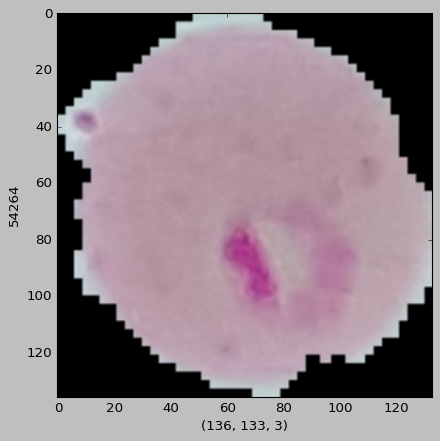

In [47]:
E_IMG = cv2.imread(Main_Train_Data["PNG"][70])
plt.xlabel(E_IMG.shape)
plt.ylabel(E_IMG.size)
plt.imshow(E_IMG)

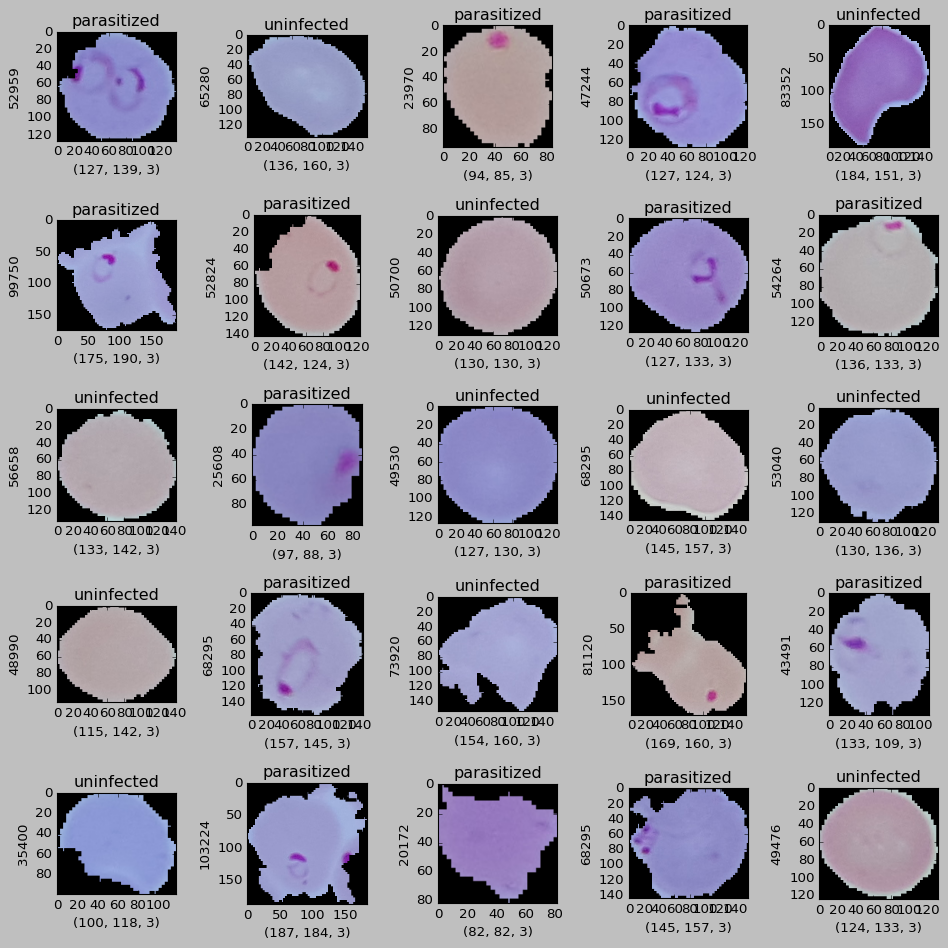

In [48]:
figure, axis = plt.subplots(nrows=5, ncols=5, figsize=(12,12))

for i, ax in enumerate(axis.flat):
  IMG = cv2.imread(Main_Train_Data["PNG"][i])
  ax.set_xlabel(IMG.shape)
  ax.set_ylabel(IMG.size)
  ax.set_title(Main_Train_Data["CATEGORY"][i])
  ax.imshow(IMG, cmap="Greys_r")
plt.tight_layout()
plt.show()

**Image Edge Detection**

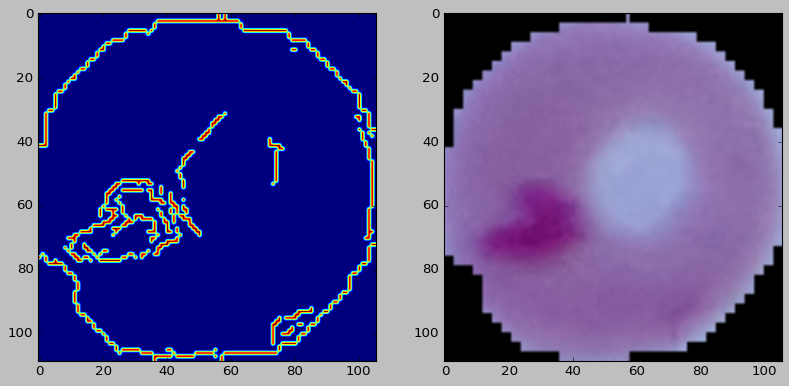

In [52]:
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

E_IMG = cv2.imread(Main_Train_Data["PNG"][11000])
C_IMG = cv2.Canny(E_IMG, 10, 100)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

**Image Thresholding**

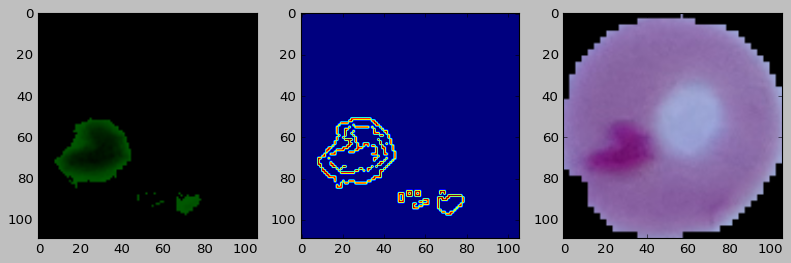

In [53]:
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,12))

E_IMG = cv2.imread(Main_Train_Data["PNG"][11000])
_, T_IMG = cv2.threshold(E_IMG, 90, 155, cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(T_IMG, 10, 100)

axis[0].imshow(T_IMG)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

**Finding Contours**

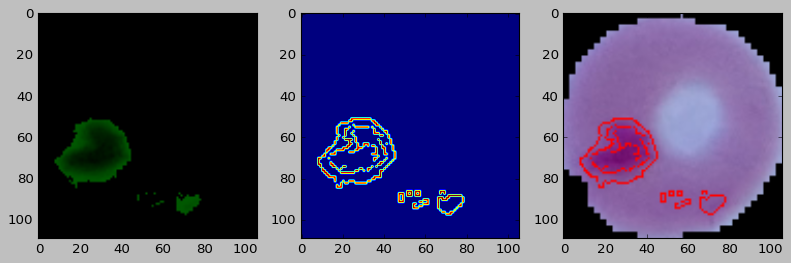

In [88]:
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,12))

E_IMG = cv2.imread(Main_Train_Data["PNG"][11000])
_, T_IMG = cv2.threshold(E_IMG, 90, 155, cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(T_IMG, 10, 100)

contours, _ = cv2.findContours(C_IMG, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_Contour = cv2.drawContours(E_IMG, contours, -1, (255,0,0), 1)

axis[0].imshow(T_IMG)
axis[1].imshow(C_IMG)
axis[2].imshow(Draw_Contour)

**Bounding rectangle**

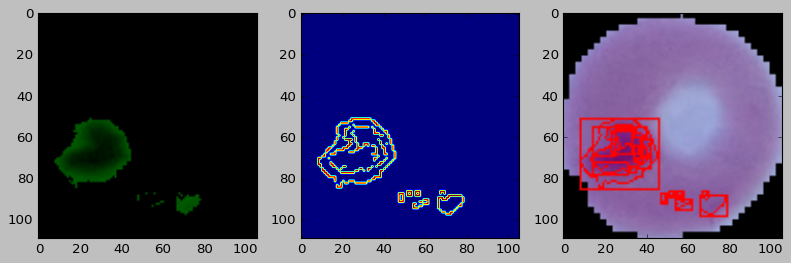

In [89]:
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,12))

for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_Contour, (x,y), (x+w, y+h), (255,0,0), 1)

axis[0].imshow(T_IMG)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

**Combining all steps and checking on another image**

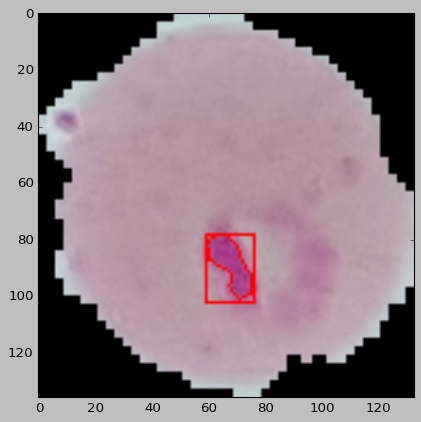

In [91]:
# Loding the image indexed at 18000
E_IMG2 = cv2.imread(Main_Train_Data["PNG"][70]) 

# Threshold
_, T_IMG2 = cv2.threshold(E_IMG2, 90, 155, cv2.THRESH_TOZERO_INV)

# Edge detection
C_IMG2 = cv2.Canny(T_IMG2, 10, 100)

# Finding contours
contours2, _ = cv2.findContours(C_IMG2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_Contour2 = cv2.drawContours(E_IMG2, contours2, -1, (255,0,0), 1)

# Drawing rectangle around contour
for contour in contours2:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_Contour2, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(E_IMG2)

### Subsetting the dataframe into 'Parasitized' and 'Uninfected' sets

In [92]:
Parasitized_Set = Main_Train_Data[Main_Train_Data["CATEGORY"] == "parasitized"]
Parasitized_Set = Parasitized_Set.reset_index()
print(Parasitized_Set.head(-1)) 

       index                                                PNG     CATEGORY
0          0  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
1          2  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
2          3  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
3          5  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
4          6  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
...      ...                                                ...          ...
12473  24937  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
12474  24939  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
12475  24944  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
12476  24946  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized
12477  24947  ../content/Capstone-3-Rayees-Cell-Images-Class...  parasitized

[12478 rows x 3 columns]


In [93]:
Uninfected_Set = Main_Train_Data[Main_Train_Data["CATEGORY"] == "uninfected"]
Uninfected_Set = Uninfected_Set.reset_index()
print(Uninfected_Set.head(-1))

       index                                                PNG    CATEGORY
0          1  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
1          4  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
2          7  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
3         10  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
4         12  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
...      ...                                                ...         ...
12473  24951  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
12474  24952  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
12475  24953  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
12476  24954  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected
12477  24955  ../content/Capstone-3-Rayees-Cell-Images-Class...  uninfected

[12478 rows x 3 columns]


**Image process test on subsetted dataframes**

**Parasitized Set**

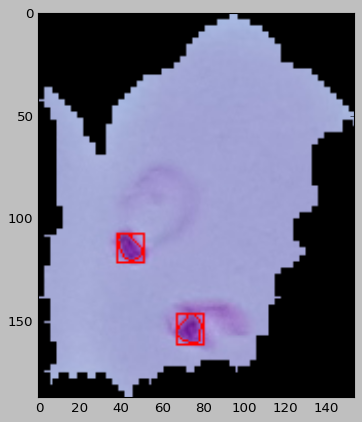

In [94]:
# Loding the image indexed at 52
E_IMG_P1 = cv2.imread(Parasitized_Set["PNG"][520]) 

# Threshold
_, T_IMG_P1 = cv2.threshold(E_IMG_P1, 90, 155, cv2.THRESH_TOZERO_INV)

# Edge detection
C_IMG_P1 = cv2.Canny(T_IMG_P1, 10, 100)

# Finding contours
contoursP1, _ = cv2.findContours(C_IMG_P1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_ContourP1 = cv2.drawContours(E_IMG_P1, contoursP1, -1, (255,0,0), 1)

# Drawing rectangle around contour
for contour in contoursP1:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_ContourP1, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(E_IMG_P1)

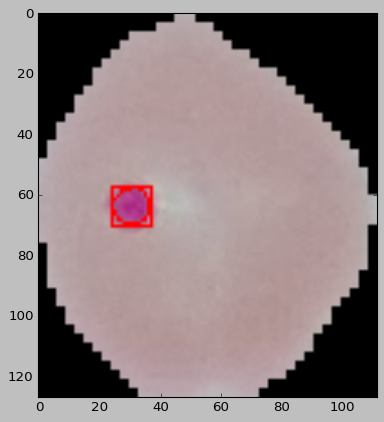

In [95]:
# Loding the image indexed at 1000
E_IMG_P2 = cv2.imread(Parasitized_Set["PNG"][1000]) 

# Threshold
_, T_IMG_P2 = cv2.threshold(E_IMG_P2, 90, 155, cv2.THRESH_TOZERO_INV)

# Edge detection
C_IMG_P2 = cv2.Canny(T_IMG_P2, 10, 100)

# Finding contours
contoursP2, _ = cv2.findContours(C_IMG_P2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_ContourP2 = cv2.drawContours(E_IMG_P2, contoursP2, -1, (255,0,0), 1)

# Drawing rectangle around contour
for contour in contoursP2:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_ContourP2, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(E_IMG_P2)

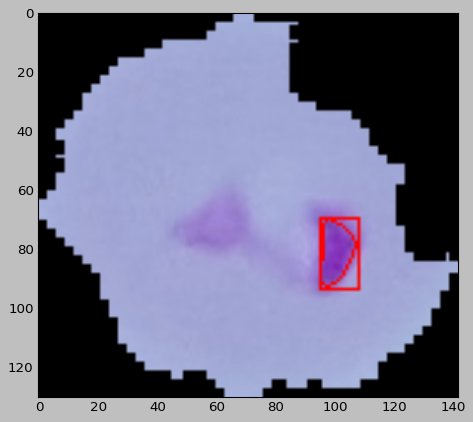

In [97]:
# Loding the image indexed at 11000
E_IMG_P3 = cv2.imread(Parasitized_Set["PNG"][10000]) 

# Threshold
_, T_IMG_P3 = cv2.threshold(E_IMG_P3, 90, 155, cv2.THRESH_TOZERO_INV)

# Edge detection
C_IMG_P3 = cv2.Canny(T_IMG_P3, 10, 100)

# Finding contours
contoursP3, _ = cv2.findContours(C_IMG_P3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Draw_ContourP3 = cv2.drawContours(E_IMG_P3, contoursP3, -1, (255,0,0), 1)

# Drawing rectangle around contour
for contour in contoursP3:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(Draw_ContourP3, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(E_IMG_P3)

### Applying to all images

**Parasitized Set**

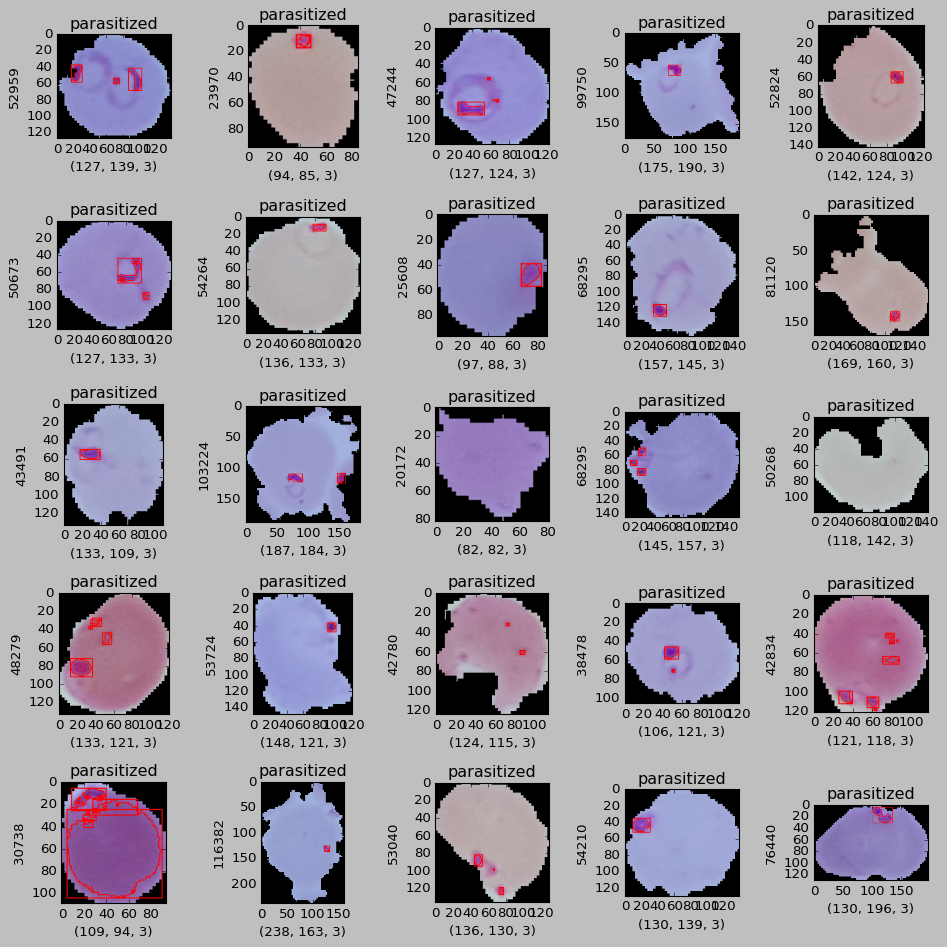

In [98]:
figure, axis = plt.subplots(nrows=5, ncols=5, figsize=(12,12))

for i, ax in enumerate(axis.flat):
  E_IMG_PL = cv2.imread(Parasitized_Set["PNG"][i])
  _, T_IMG_PL = cv2.threshold(E_IMG_PL, 90, 155, cv2.THRESH_TOZERO_INV)
  C_IMG_PL = cv2.Canny(T_IMG_PL, 10, 100)
  contoursPL, _ = cv2.findContours(C_IMG_PL, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  Draw_ContourPL = cv2.drawContours(E_IMG_PL, contoursPL, -1, (255,0,0), 1)

  for contour in contoursPL:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(Draw_ContourPL, (x,y), (x+w, y+h), (255,0,0), 1)

  ax.set_xlabel(E_IMG_PL.shape)
  ax.set_ylabel(E_IMG_PL.size)
  ax.set_title(Parasitized_Set["CATEGORY"][i])
  ax.imshow(E_IMG_PL, cmap="Greys_r")

plt.tight_layout()
plt.show()

**Uninfected Set**

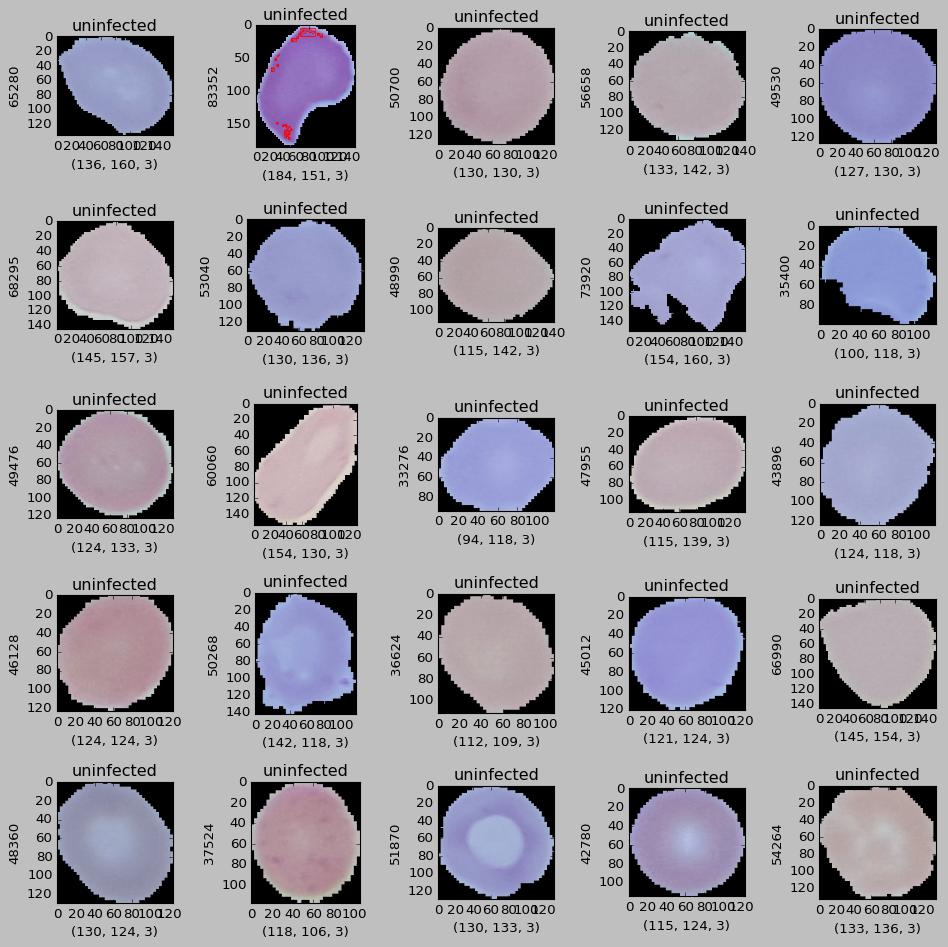

In [99]:
figure, axis = plt.subplots(nrows=5, ncols=5, figsize=(12,12))

for i, ax in enumerate(axis.flat):
  E_IMG_UL = cv2.imread(Uninfected_Set["PNG"][i])
  _, T_IMG_UL = cv2.threshold(E_IMG_UL, 90, 155, cv2.THRESH_TOZERO_INV)
  C_IMG_UL = cv2.Canny(T_IMG_UL, 10, 100)
  contoursUL, _ = cv2.findContours(C_IMG_UL, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  Draw_ContourUL = cv2.drawContours(E_IMG_UL, contoursUL, -1, (255,0,0), 1)

  for contour in contoursUL:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(Draw_ContourUL, (x,y), (x+w, y+h), (255,0,0), 1)

  ax.set_xlabel(E_IMG_UL.shape)
  ax.set_ylabel(E_IMG_UL.size)
  ax.set_title(Uninfected_Set["CATEGORY"][i])
  ax.imshow(E_IMG_UL, cmap="Greys_r")

plt.tight_layout()
plt.show()

## Preprocessing steps
### Image Augmentation

Generating new augmented images from original dataset using **Keras ImageDataGenerator**

**Generator Structure**

In [100]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                         rotation_range=25,
                                         shear_range=0.2,
                                         zoom_range=0.1,
                                         brightness_range=[0.4, 0.8],
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         validation_split=0.1)

In [101]:
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)

**Image generator - example**

<function matplotlib.pyplot.show>

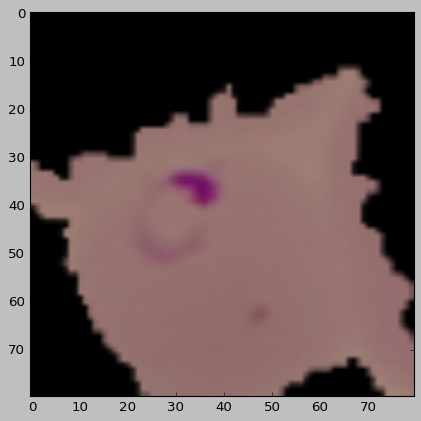

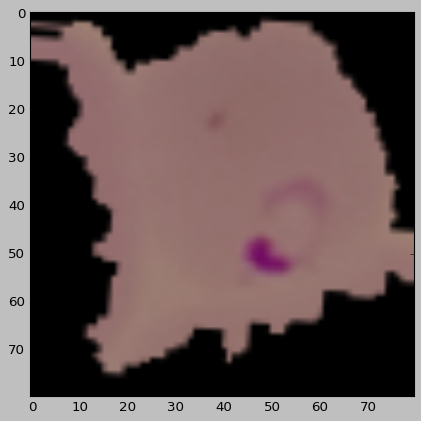

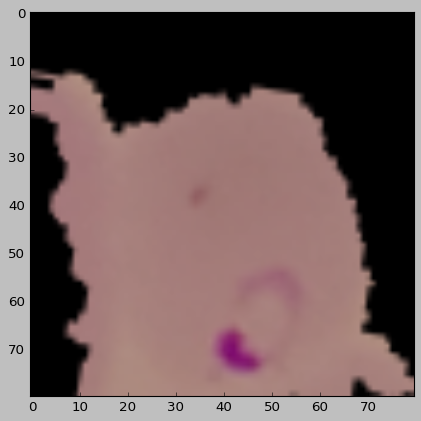

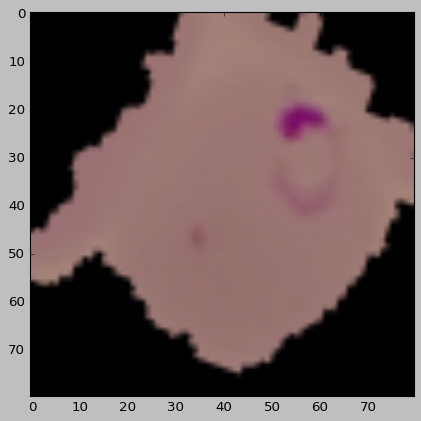

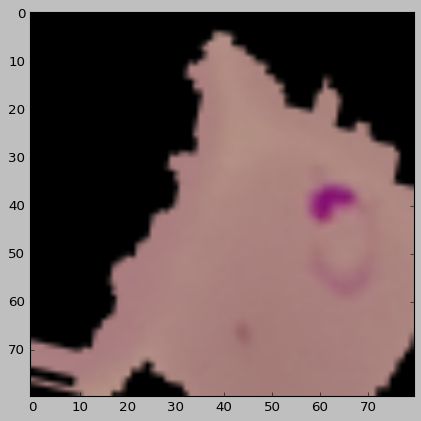

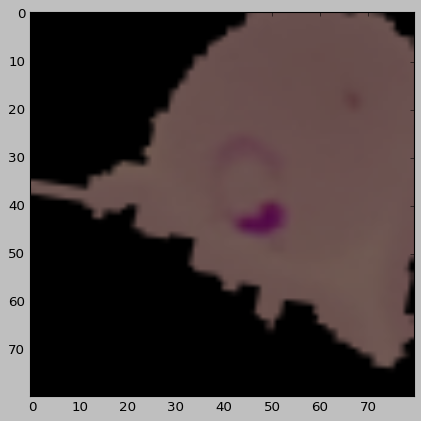

In [102]:
Example_IMG = Main_Train_Data["PNG"][5]
Load_Image = image.load_img(Example_IMG, target_size=(80,80))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0

for batch in Train_IMG_Generator.flow(Array_Image, batch_size=32):
  plt.figure(i)
  Image = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i % 6 == 0:
    break
plt.show

### Splitting the data (Train/Validation/Test)

In [104]:
Train_IMG_Set = Train_IMG_Generator.flow_from_dataframe(dataframe = Main_Train_Data,
                                                        x_col = "PNG",
                                                        y_col = "CATEGORY",
                                                        color_mode = "rgb",
                                                        class_mode = "binary",
                                                        subset = "training")

Found 22463 validated image filenames belonging to 2 classes.


In [105]:
Validation_IMG_Set = Train_IMG_Generator.flow_from_dataframe(dataframe = Main_Train_Data,
                                                             x_col = "PNG",
                                                             y_col = "CATEGORY",
                                                             color_mode = "rgb",
                                                             class_mode = "binary",
                                                             subset = "validation")

Found 2495 validated image filenames belonging to 2 classes.


In [106]:
Test_IMG_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Test_Data,
                                                       x_col = "PNG",
                                                       y_col = "CATEGORY",
                                                       color_mode = "rgb",
                                                       class_mode = "binary",
                                                       shuffle = False)

Found 2600 validated image filenames belonging to 2 classes.


**Checking the first five index of split data**

In [108]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---" * 20)

print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---" * 20)

print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)
print("---" * 20)

TRAIN: 
{'parasitized': 0, 'uninfected': 1}
[0, 0, 0, 1, 0]
(256, 256, 3)
------------------------------------------------------------
VALIDATION: 
{'parasitized': 0, 'uninfected': 1}
[0, 1, 0, 0, 1]
(256, 256, 3)
------------------------------------------------------------
TEST: 
{'parasitized': 0, 'uninfected': 1}
[0, 0, 0, 0, 0]
(256, 256, 3)
------------------------------------------------------------


## Modeling
### Convolutional Neural Network (CNN) model

**Importing the necessary packages**


In [121]:
# MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils.vis_utils import plot_model
from keras.models import load_model  

#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

**Creating the convolutional base**

In [122]:
Model = Sequential()

Model.add(SeparableConv2D(12,(3,3),activation="relu",
                 input_shape=(256,256,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(SeparableConv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

**Adding Dense layers on top**

In [123]:
# Flattening 
Model.add(Flatten())

# Dense layers
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

**Displaying the architecture of the model**

In [124]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 254, 254, 12)     75        
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 12)     48        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 12)     0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 127, 127, 24)     420       
 leConv2D)                                                       
                                                                 
 dropout (Dropout)           (None, 127, 127, 24)      0

**Setting the Callback option**

In [125]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5, mode="min")

**Compiling the model**

In [126]:
Model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Training the CNN model

**Fitting**

In [127]:
CNN_Model = Model.fit(Train_IMG_Set, validation_data=Validation_IMG_Set, 
                      callbacks=Call_Back,
                      epochs=5)

Epoch 1/5
702/702 [==============================] - 728s 1s/step - loss: 0.5208 - accuracy: 0.7390 - val_loss: 0.2823 - val_accuracy: 0.8974
Epoch 2/5
702/702 [==============================] - 702s 999ms/step - loss: 0.2820 - accuracy: 0.8977 - val_loss: 0.2852 - val_accuracy: 0.9114
Epoch 3/5
702/702 [==============================] - 697s 992ms/step - loss: 0.2414 - accuracy: 0.9196 - val_loss: 0.2663 - val_accuracy: 0.9098
Epoch 4/5
702/702 [==============================] - 696s 991ms/step - loss: 0.2292 - accuracy: 0.9254 - val_loss: 0.2380 - val_accuracy: 0.9134
Epoch 5/5
702/702 [==============================] - 696s 990ms/step - loss: 0.2224 - accuracy: 0.9305 - val_loss: 0.2353 - val_accuracy: 0.9234


**Saving the model**

In [128]:
Model.save("./Cell_Last_Prediction_Model")

INFO:tensorflow:Assets written to: ./Cell_Last_Prediction_Model/assets


In [129]:
Model.save("Prediction_Model.h5")

### Evaluating the model

In [130]:
Grap_Data = pd.DataFrame(CNN_Model.history)

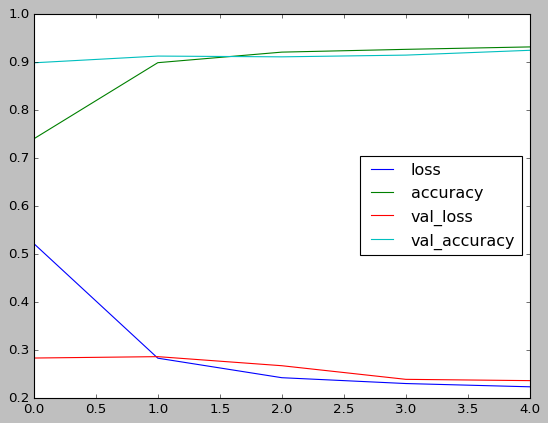

In [131]:
Grap_Data.plot()

**Accuracy**

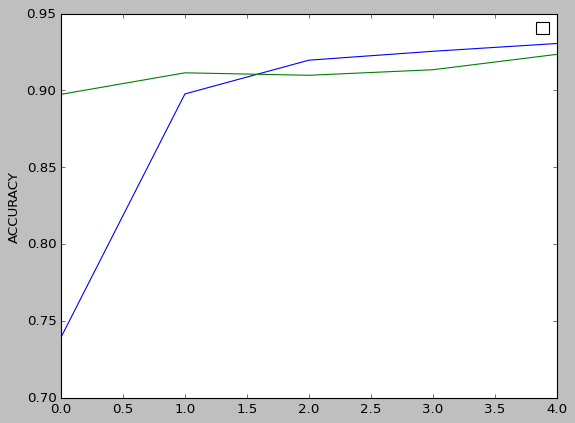

In [132]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

**Loss**

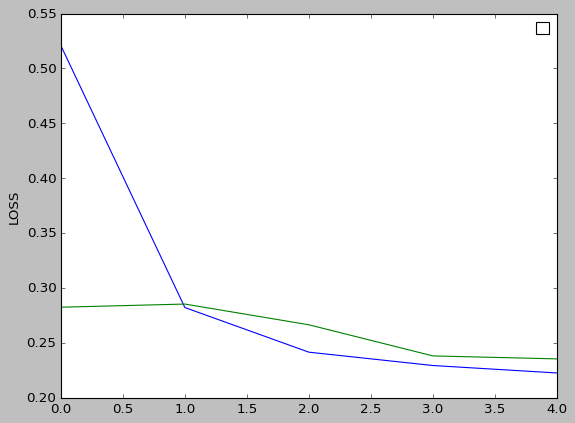

In [133]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

**Epochs vs Accuracy/Loss Comparison**

In [134]:
History_Grap = CNN_Model.history
val_losses = History_Grap["val_loss"]
val_acc = History_Grap["val_accuracy"]
epochs = range(1,len(val_losses)+1)

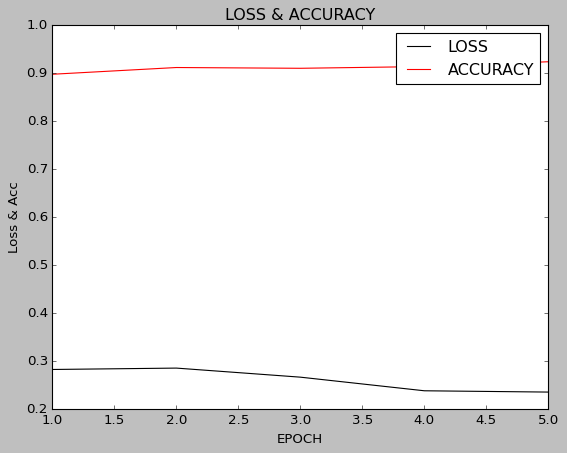

In [135]:
plt.plot(epochs,val_losses,"k-",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

### Prediction

In [136]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

82/82 [==============================] - 41s 493ms/step - loss: 0.2414 - accuracy: 0.9181
LOSS:  0.2414
ACCURACY:  0.92


In [137]:
Model_Test_Prediction = Model.predict(Test_IMG_Set)

In [138]:
Model_Test_Prediction_ = Model_Test_Prediction.argmax(axis=-1)

In [139]:
print(Model_Test_Prediction_)

[0 0 0 ... 0 0 0]


**Predicted classes**

In [141]:
Model_Test_Prediction_Classes = np.argmax(Model_Test_Prediction, axis=-1)

In [142]:
print(Model_Test_Prediction_Classes)

[0 0 0 ... 0 0 0]




*   0 >>> -- Parasitized
*   1 >>> -- Uninfected



### Deployment on test images

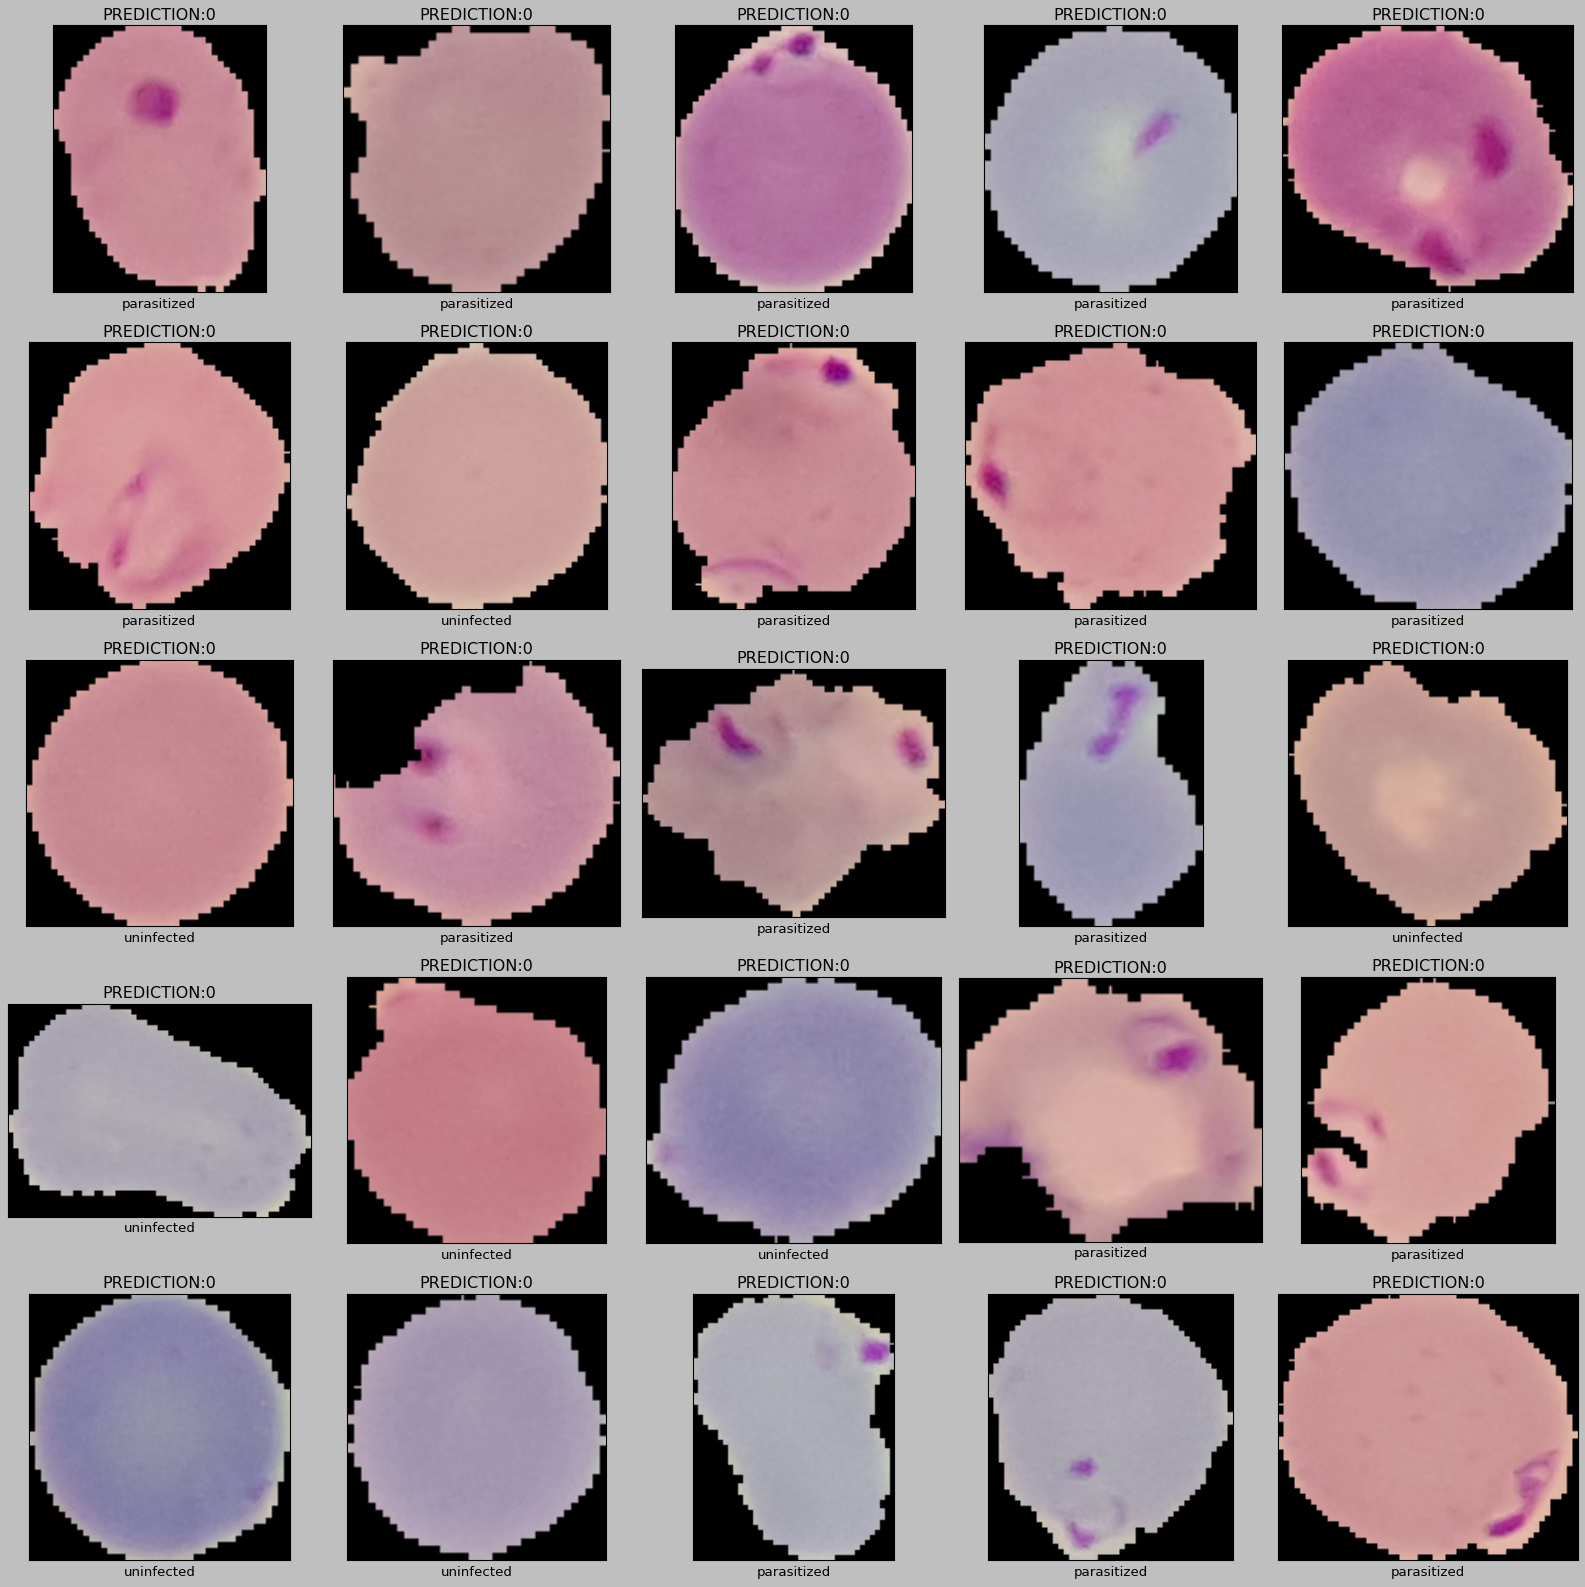

In [143]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Test_Data["PNG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction_Classes[i]}")
    ax.set_xlabel(Main_Test_Data["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

## Summary



*   Using the CNN model we successfully classified images from this dataset with high accuracy and minimal loss. Performance metrics are below,

    * Training Accuracy: 0.9305
    * Validation Accuracy: 0.9234
    * Training Loss: 0.2224
    * Validation Loss: 0.2353